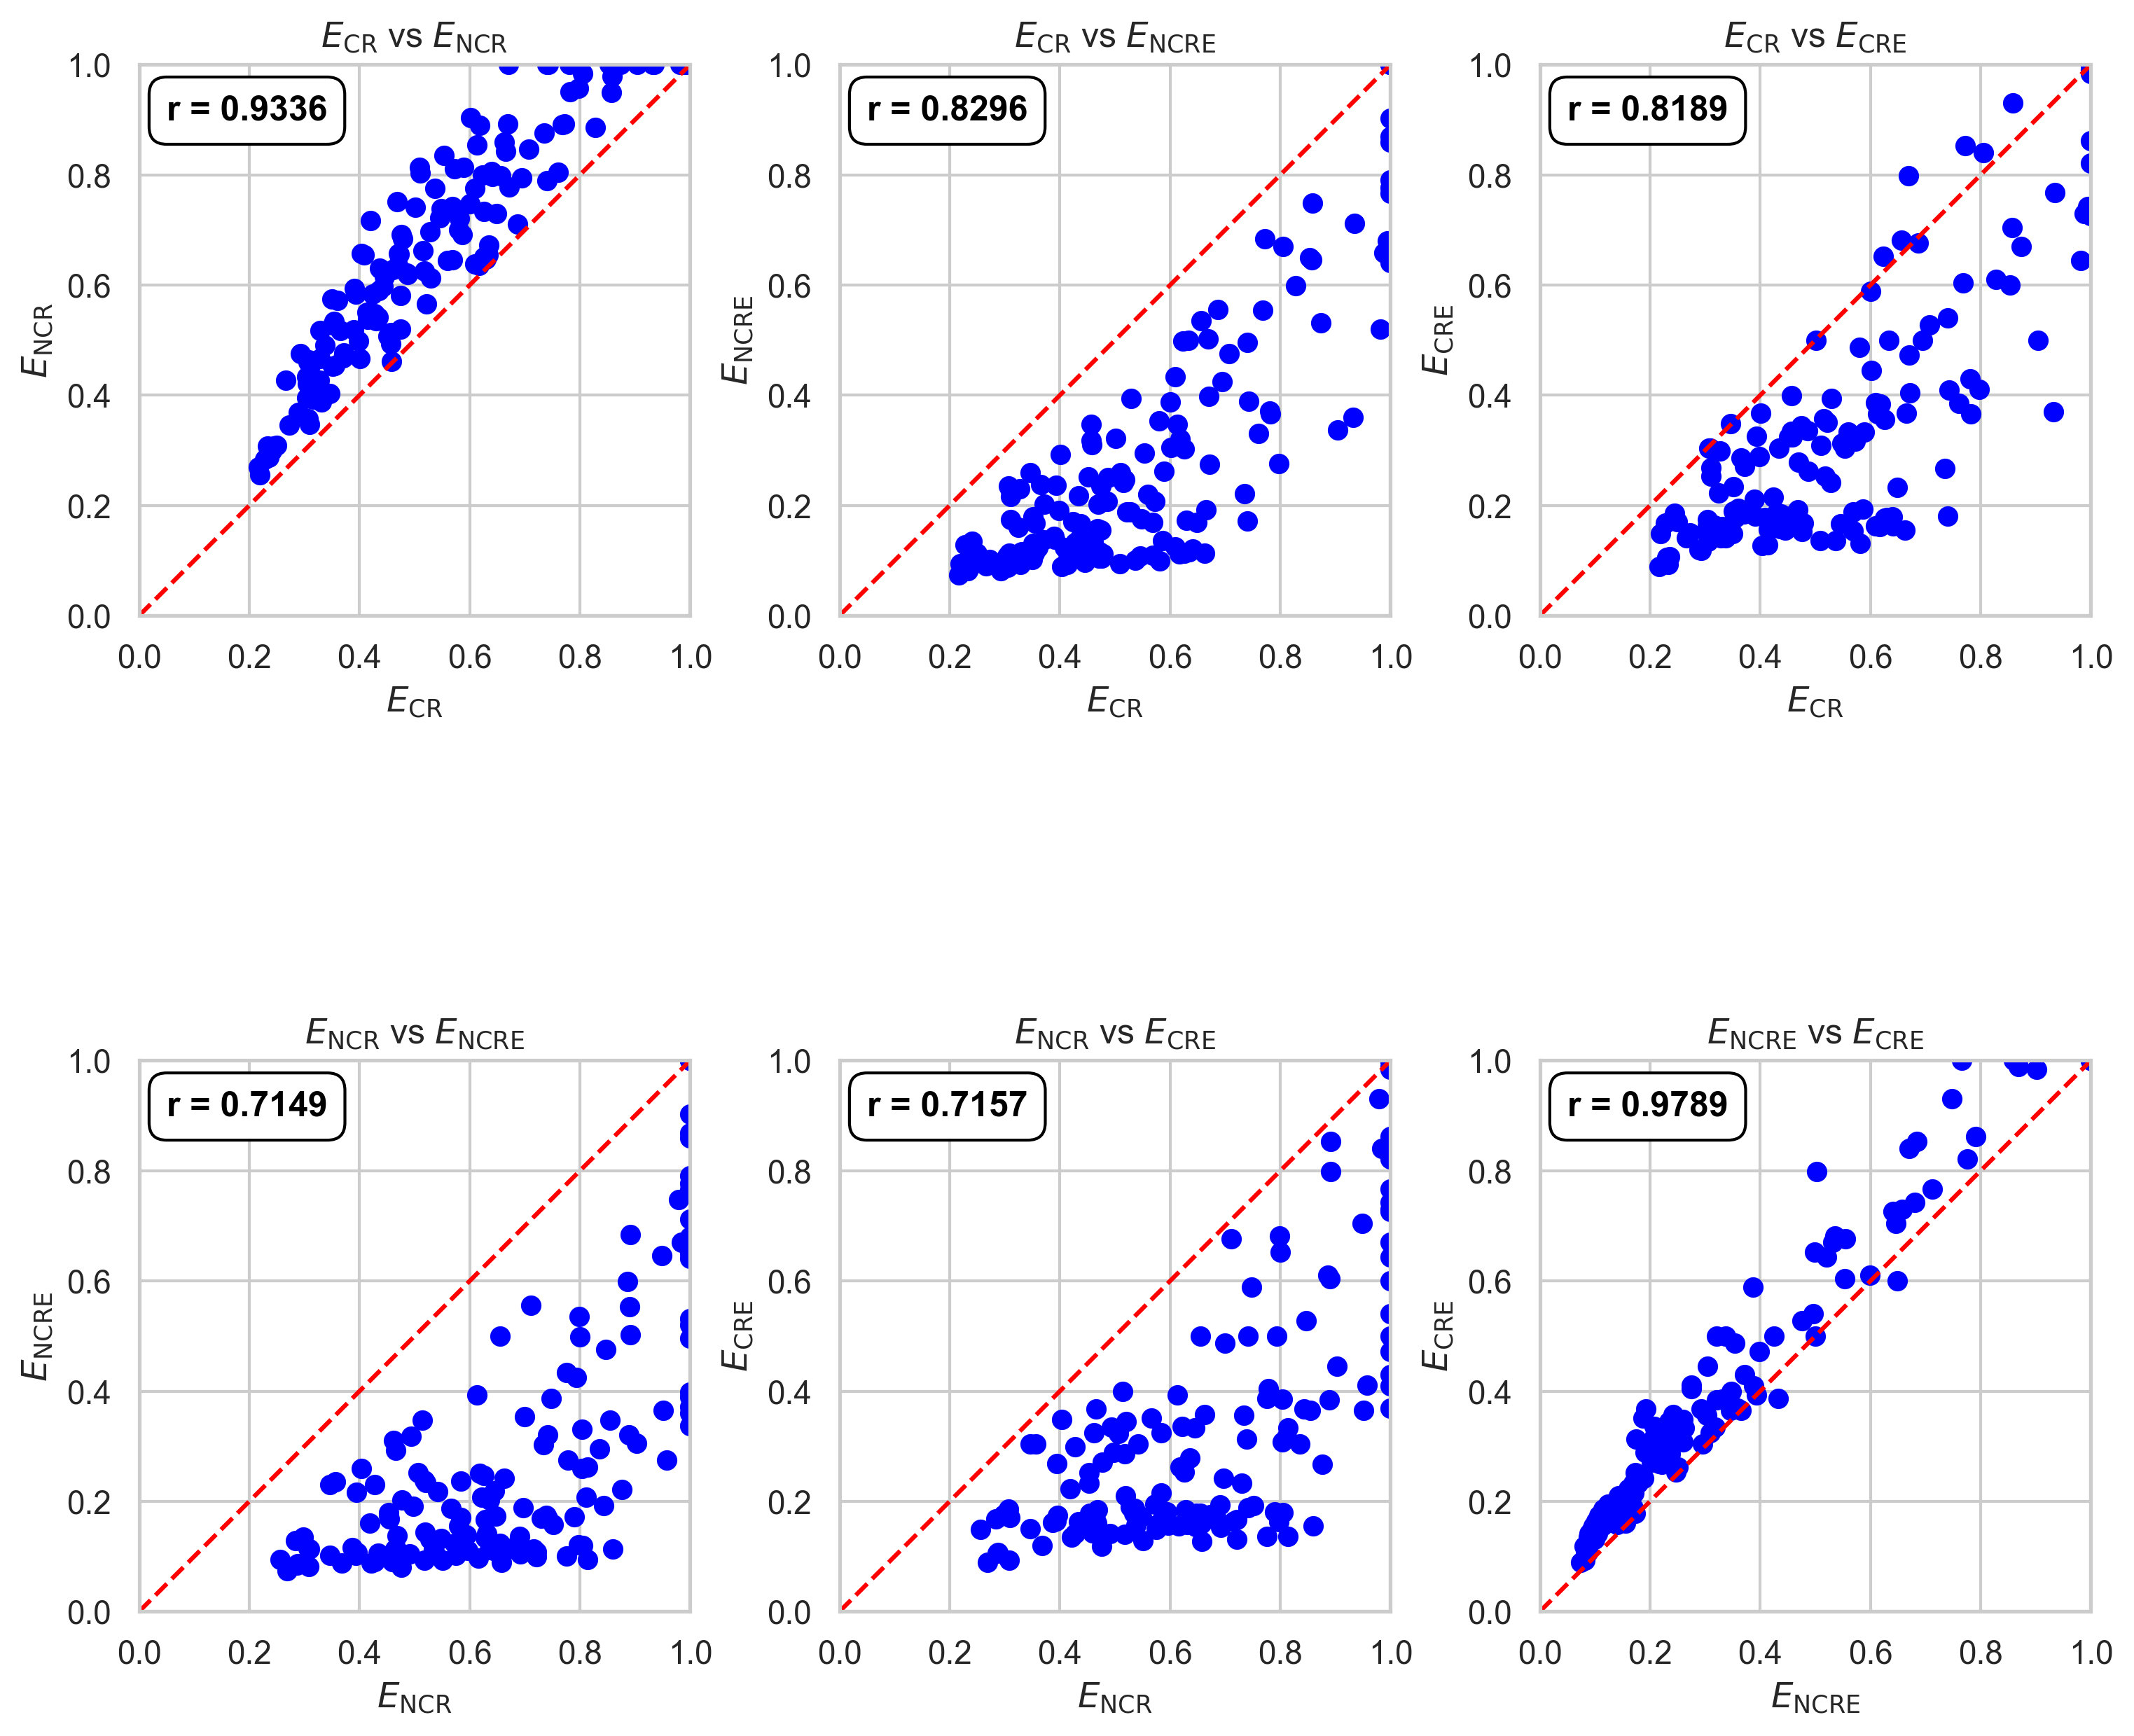

In [4]:


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

dfeff = pd.read_csv('iterationsNORMAL/iter_1/efficiencies.csv')
dfeff.rename(columns={
    'efficiency_RDM': 'E_CR',
    'efficiency_RDM_FDH': 'E_NCR',
    'efficiency_EAT': 'E_NCRE',
    'efficiency_EAT_FDH': 'E_CRE'
}, inplace=True)


pairs = [('E_CR', 'E_NCR'), ('E_CR', 'E_NCRE'), ('E_CR', 'E_CRE'),
         ('E_NCR', 'E_NCRE'), ('E_NCR', 'E_CRE'),
         ('E_NCRE', 'E_CRE')]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 10), dpi=300)  

latex_names = {
    'E_CR': r'$E_{\mathrm{CR}}$',
    'E_NCR': r'$E_{\mathrm{NCR}}$',
    'E_NCRE': r'$E_{\mathrm{NCRE}}$',
    'E_CRE': r'$E_{\mathrm{CRE}}$'
}

for i, (var1, var2) in enumerate(pairs, 1):
    plt.subplot(2, 3, i)
    
    x = dfeff[f'{var1}']
    y = dfeff[f'{var2}']
    
    plt.scatter(x, y, label=f'{var1} vs {var2}', color='blue')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    
    r = np.corrcoef(x, y)[0, 1]
    plt.text(0.05, 0.9, f'r = {r:.4f}', transform=plt.gca().transAxes,
             fontsize=12, fontweight='bold', color='black',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel(latex_names[var1])
    plt.ylabel(latex_names[var2])
    plt.title(f'{latex_names[var1]} vs {latex_names[var2]}')
    
    plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout(pad=0.0)
plt.show()
